[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alok8663/Deep_Learning/blob/main/Unsupervised_Deep_Learning/Mega_Case_Study.ipynb)

# Mega Case Study- Make a Hybrid Deep Learning Model

# Part-I Identifying the frauds with the Self-Organizing Maps

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset=pd.read_csv('Credit_Card_Applications.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

In [5]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10651 sha256=5a3211b09b62372c0b06f8899fe7c12a50bcc07b9fa2a255d91118e8e8db1999
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


In [6]:
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

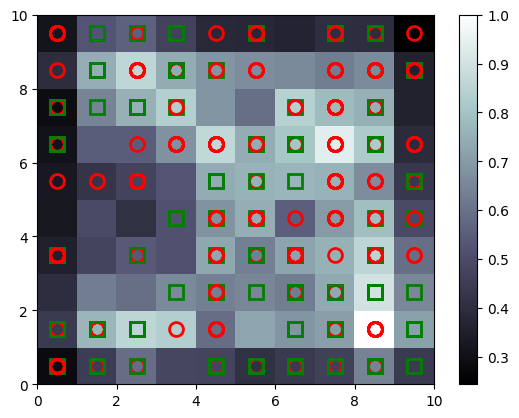

In [7]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
  w=som.winner(x)
  plot(w[0]+0.5,
      w[1]+0.5,
      markers[y[i]],
      markeredgecolor=colors[y[i]],
      markerfacecolor='None',
      markersize=10,
      markeredgewidth=2)
show()

In [11]:
mappings=som.win_map(X)
frauds=np.concatenate((mappings[(8,1)],mappings[(7,6)]),axis=0)

In [12]:
frauds=sc.inverse_transform(frauds)

In [16]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15672894
15651868
15672637
15736533
15593834
15609987
15609758
15611682
15615296
15618258
15719940
15761158
15711742
15761733
15770995
15736399
15766734
15667934


# Part-2 Going from Unsupervised to Supervised Deep Learning

# Creating the Matrix of Features

In [8]:
customers=dataset.iloc[:,1:].values

# Creating the Dependent Variable

In [13]:
is_fraud=np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i]==1

# Part-3 ANN

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customers=sc.fit_transform(customers)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

In [19]:
classifier=Sequential()

In [20]:
classifier.add(Dense(units=2,kernel_initializer='uniform',activation='relu',input_dim=15))

In [21]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
classifier.fit(customers,is_fraud,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 2s 3ms/step - loss: 0.0919 - accuracy: 1.0000
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 1.0000


In [25]:
y_pred=classifier.predict(customers)

22/22 [==============================] - 0s 2ms/step


In [28]:
y_pred=np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)

In [33]:
print(y_pred)

[[1.55657140e+07 1.55657140e+07 8.06875154e-03]
 [1.55659960e+07 1.55659960e+07 5.39750280e-03]
 [1.55664950e+07 1.55664950e+07 1.29466737e-02]
 ...
 [1.58150950e+07 1.58150950e+07 7.96133280e-03]
 [1.58152710e+07 1.58152710e+07 1.50289573e-02]
 [1.58154430e+07 1.58154430e+07 1.88327096e-02]]


In [39]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [40]:
print(pd.DataFrame(y_pred))

              0           1         2
0    15565714.0  15565714.0  0.008069
1    15565996.0  15565996.0  0.005398
2    15566495.0  15566495.0  0.012947
3    15567834.0  15567834.0  0.012248
4    15567839.0  15567839.0  0.005016
..          ...         ...       ...
685  15814116.0  15814116.0  0.028176
686  15815040.0  15815040.0  0.007999
687  15815095.0  15815095.0  0.007961
688  15815271.0  15815271.0  0.015029
689  15815443.0  15815443.0  0.018833

[690 rows x 3 columns]
